In [108]:
import qiskit
from qiskit import *
from qiskit.visualization import *
import numpy as np
import math
from math import *

In [109]:
def variacional(param1, param2,param3):
    circ = QuantumCircuit(1,1)
    circ.u3(param1,param2,param3,0)
    circ.measure(0,0)
    return circ

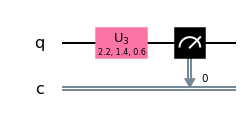

In [110]:
chute1=2.2
chute2=1.4
chute3=0.6
variacional(chute1,chute2,chute3).draw('mpl')

In [111]:
qc = variacional(chute1,chute2,chute3)

In [112]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=simulator, shots=1024).result().get_counts(qc)    

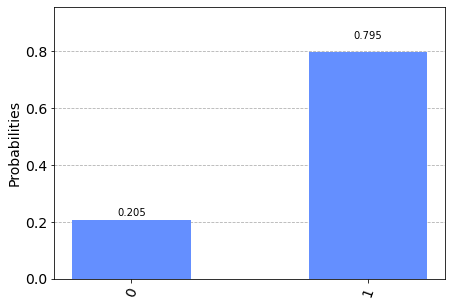

In [113]:
plot_histogram(counts)

In [114]:
a=0-0.707j
b=0+0.707j
prob = [abs(a)**2, abs(b)**2]


In [115]:
def funcao_objetivo(circ, prob_desejada, theta,phi,lamb):    
    
    circ = variacional(theta, phi, lamb)
    counts = execute(circ, backend=simulator, shots=1024).result().get_counts(circ)
    
    if '0' not in counts:
        counts['0'] = 0
        
    if '1' not in counts:
        counts['1'] = 0
    
    total = counts['0']+counts['1']
    fobj = abs(prob_desejada[0]-(counts['0']/total)) + abs(prob_desejada[1]-(counts['1']/total))
    
    return fobj
    

In [116]:
theta1 = np.linspace(0,np.pi,50)
theta2 = np.linspace(0,np.pi,50)
theta3 = np.linspace(0,np.pi,50)

In [117]:
f=[]
for i in range(len(theta1)):
    f.append(funcao_objetivo(qc,prob,theta1[i],theta2[i],theta3[i]))
    print('f =', funcao_objetivo(qc,prob,theta1[i],theta2[i],theta3[i]), '  theta = ', theta1[i])

f = 1.0   theta =  0.0
f = 0.998046875   theta =  0.0641141357875468
f = 0.986328125   theta =  0.1282282715750936
f = 0.978515625   theta =  0.19234240736264038
f = 0.9609375   theta =  0.2564565431501872
f = 0.947265625   theta =  0.32057067893773394
f = 0.939453125   theta =  0.38468481472528077
f = 0.8984375   theta =  0.4487989505128276
f = 0.892578125   theta =  0.5129130863003744
f = 0.82421875   theta =  0.5770272220879211
f = 0.80859375   theta =  0.6411413578754679
f = 0.75390625   theta =  0.7052554936630148
f = 0.72265625   theta =  0.7693696294505615
f = 0.66015625   theta =  0.8334837652381083
f = 0.59765625   theta =  0.8975979010256552
f = 0.587890625   theta =  0.9617120368132019
f = 0.5390625   theta =  1.0258261726007487
f = 0.4296875   theta =  1.0899403083882955
f = 0.392578125   theta =  1.1540544441758422
f = 0.33984375   theta =  1.218168579963389
f = 0.28515625   theta =  1.2822827157509358
f = 0.162109375   theta =  1.3463968515384828
f = 0.171875   theta =  1

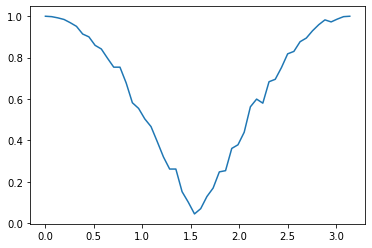

In [118]:
import matplotlib.pyplot as plt

plt.plot(theta1, f)

In [119]:
minimo = min(f)
pos = f.index(minimo)
theta1[pos]

1.538739258901123

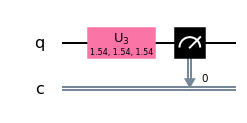

In [120]:
qc_teste = variacional(theta1[pos],theta2[pos],theta3[pos])
qc_teste.draw('mpl')

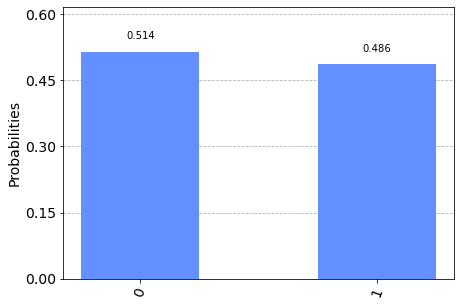

In [121]:

counts_teste = execute(qc_teste, backend=simulator, shots=1024).result().get_counts(qc_teste)
plot_histogram(counts_teste)